In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasetapd/README.dataset.txt
/kaggle/input/datasetapd/README.roboflow.txt
/kaggle/input/datasetapd/data.yaml
/kaggle/input/datasetapd/valid/labels/construction-3-_mp4-219_jpg.rf.416dbf917b54d5895e2430fa0d6f1b66.txt
/kaggle/input/datasetapd/valid/labels/construction-1-_mp4-147_jpg.rf.a9062a80b06ac796f7afb269e5f18c53.txt
/kaggle/input/datasetapd/valid/labels/Movie-on-10-31-22-at-10_08-AM_mov-13_jpg.rf.91dc3b79da617fb2e4321f27f48f21f4.txt
/kaggle/input/datasetapd/valid/labels/2009_002778_jpg.rf.7c8977ed190a2ce4211ef58f66864066.txt
/kaggle/input/datasetapd/valid/labels/004424_jpg.rf.0470713b945b08839105cde711db62d9.txt
/kaggle/input/datasetapd/valid/labels/casino_0448_jpg.rf.090df4137a5926092c541ee5c6918868.txt
/kaggle/input/datasetapd/valid/labels/MariusConePic31_png_jpg.rf.1fd6fccfeef580e0e0061d78d5a248a4.txt
/kaggle/input/datasetapd/valid/labels/construction-1027-_jpg.rf.e78f55761814a8726ea51993407957af.txt
/kaggle/input/datasetapd/valid/labels/IMG_3103_mp4-18_jpg.rf.39e5

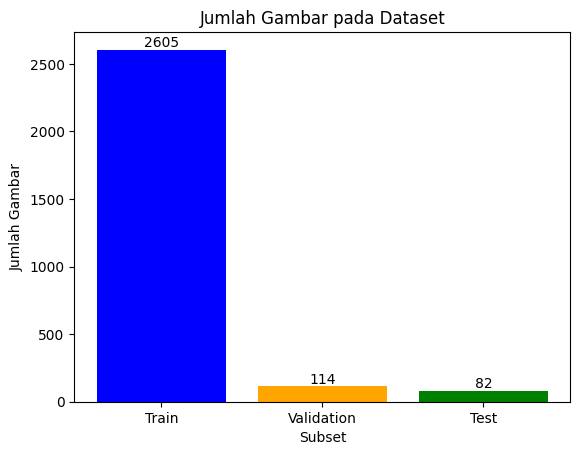

In [14]:
import os
import matplotlib.pyplot as plt

dataset_path = "/kaggle/input/datasetapd"  # Ganti dengan path dataset yolov5 Anda

# Menghitung jumlah gambar untuk setiap subset
train_images = len(os.listdir(os.path.join(dataset_path, "train", "images")))
val_images = len(os.listdir(os.path.join(dataset_path, "valid", "images")))
test_images = len(os.listdir(os.path.join(dataset_path, "test", "images")))

# Visualisasi persentase dataset
labels = ['Train', 'Validation', 'Test']
sizes = [train_images, val_images, test_images]

# Membuat diagram batang
fig, ax = plt.subplots()
bars = ax.bar(labels, sizes, color=['blue', 'orange', 'green'])

# Menambahkan label angka di tengah setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Jumlah Gambar pada Dataset')
plt.xlabel('Subset')
plt.ylabel('Jumlah Gambar')
plt.show()

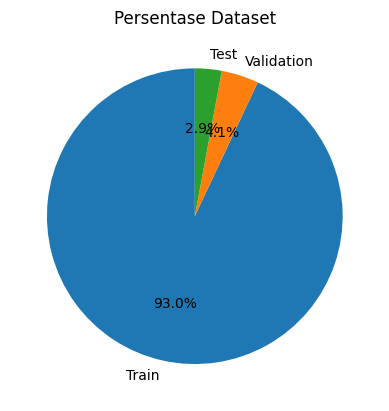

In [15]:
import os
import matplotlib.pyplot as plt

dataset_path = "/kaggle/input/datasetapd"

# Menghitung jumlah gambar untuk setiap subset
train_images = len(os.listdir(os.path.join(dataset_path, "train", "images")))
val_images = len(os.listdir(os.path.join(dataset_path, "valid", "images")))
test_images = len(os.listdir(os.path.join(dataset_path, "test", "images")))

# Visualisasi persentase dataset
labels = ['Train', 'Validation', 'Test']
sizes = [train_images, val_images, test_images]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Dataset')
plt.show()

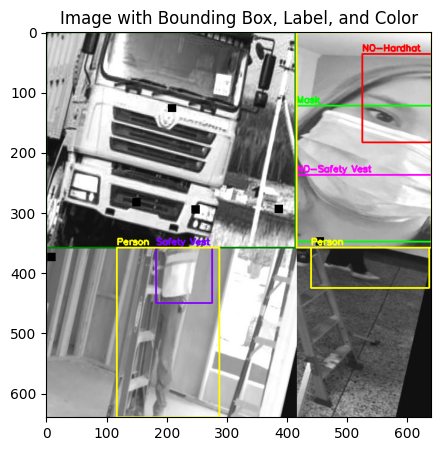

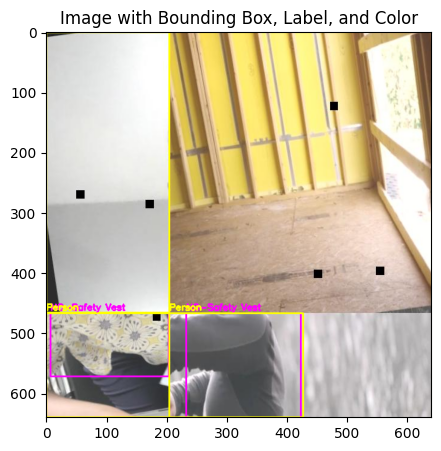

In [16]:
import os
import cv2
import random
import matplotlib.pyplot as plt

%matplotlib inline

# Path ke folder gambar dan anotasi
train_images_folder = "/kaggle/input/datasetapd/train/images"
train_annotations_folder = "/kaggle/input/datasetapd/train/labels"

# Daftar label sesuai dengan urutan yang diberikan
class_labels = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

# Daftar warna yang sesuai dengan urutan kelas
class_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0),
                (255, 0, 255), (0, 255, 255), (255, 128, 0), (255, 0, 128), (0, 130, 0), (0, 255, 130)]

# Fungsi untuk menampilkan sampel gambar dengan dan tanpa bounding box
def display_sample_images(images_folder, annotations_folder, num_images=2):
    image_files = os.listdir(images_folder)

    if not image_files:
        print("No images found in the specified folder.")
        return

    selected_images = random.sample(image_files, min(num_images, len(image_files)))

    for image_file in selected_images:
        image_path = os.path.join(images_folder, image_file)
        annotation_path = os.path.join(annotations_folder, image_file.replace(".jpg", ".txt"))

        if not os.path.exists(image_path):
            print(f"Image file not found: {image_path}")
            continue

        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to read image: {image_path}")
            continue

        original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Read bounding box annotations
        if os.path.exists(annotation_path):
            annotations = open(annotation_path, 'r').readlines()
            for annotation in annotations:
                try:
                    class_id, x_center, y_center, box_width, box_height = map(float, annotation.split()[:])
                except ValueError:
                    print(f"Error parsing annotation line: {annotation}")
                    continue

                # Convert class_id to integer and get the corresponding label and color
                class_id = int(class_id)
                label = class_labels[class_id]
                color = class_colors[class_id]

                x, y, w, h = (
                    int((x_center - box_width / 2) * image.shape[1]),
                    int((y_center - box_height / 2) * image.shape[0]),
                    int(box_width * image.shape[1]),
                    int(box_height * image.shape[0]),
                )

                # Draw bounding box with label and color on the image
                cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
                cv2.putText(image, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

            # Display image with bounding box, label, and color
            plt.figure(figsize=(10, 5))
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title('Image with Bounding Box, Label, and Color')
            plt.show()
        else:
            print(f"No annotation file found for image: {image_file}")

# Menampilkan sampel gambar
display_sample_images(train_images_folder, train_annotations_folder)


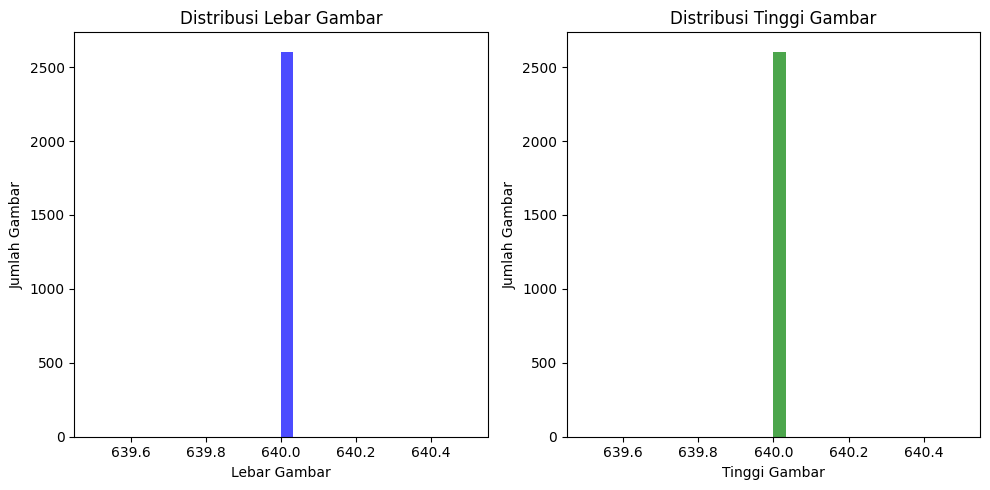

In [17]:
# Fungsi untuk menampilkan distribusi ukuran gambar
def display_image_size_distribution(images_path):
    image_files = os.listdir(images_path)
    image_sizes = []

    for image_file in image_files:
        image_path = os.path.join(images_path, image_file)
        image = cv2.imread(image_path)
        height, width, _ = image.shape
        image_sizes.append((width, height))

    widths, heights = zip(*image_sizes)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=30, color='blue', alpha=0.7)
    plt.title('Distribusi Lebar Gambar')
    plt.xlabel('Lebar Gambar')
    plt.ylabel('Jumlah Gambar')

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=30, color='green', alpha=0.7)
    plt.title('Distribusi Tinggi Gambar')
    plt.xlabel('Tinggi Gambar')
    plt.ylabel('Jumlah Gambar')

    plt.tight_layout()
    plt.show()

# Menampilkan distribusi ukuran gambar
display_image_size_distribution(train_images_folder)

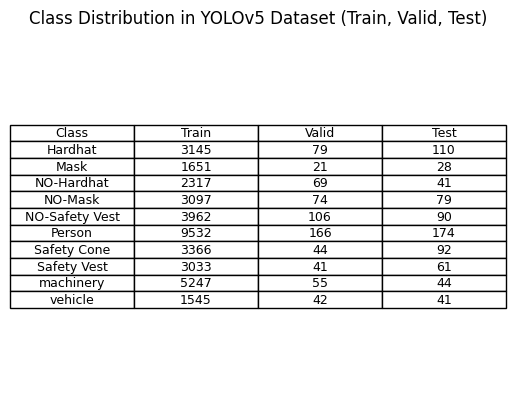

In [18]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Path ke folder train, valid, dan test
train_folder = "/kaggle/input/datasetapd/train"
valid_folder = "/kaggle/input/datasetapd/valid"
test_folder = "/kaggle/input/datasetapd/test"

# Daftar nama kelas
class_labels = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

# Fungsi untuk menghitung distribusi kelas
def calculate_class_distribution(folder_path):
    class_distribution = [0] * len(class_labels)

    labels_folder = os.path.join(folder_path, "labels")

    for file_name in os.listdir(labels_folder):
        if file_name.endswith(".txt"):
            annotation_path = os.path.join(labels_folder, file_name)
            with open(annotation_path, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_id = int(line.split()[0])
                    class_distribution[class_id] += 1

    return class_distribution

# Menghitung distribusi kelas untuk setiap folder
train_distribution = calculate_class_distribution(train_folder)
valid_distribution = calculate_class_distribution(valid_folder)
test_distribution = calculate_class_distribution(test_folder)

# Membuat DataFrame dari data
df_train = pd.DataFrame({'Class': class_labels, 'Train': train_distribution})
df_valid = pd.DataFrame({'Class': class_labels, 'Valid': valid_distribution})
df_test = pd.DataFrame({'Class': class_labels, 'Test': test_distribution})

# Merge dataframes
df_merged = pd.merge(df_train, df_valid, on='Class')
df_merged = pd.merge(df_merged, df_test, on='Class')

# Plotting tabel
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_merged.values, colLabels=df_merged.columns, cellLoc='center', loc='center')

plt.title('Class Distribution in YOLOv5 Dataset (Train, Valid, Test)')
plt.show()


In [7]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Install dependencies
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17265, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 17265 (delta 107), reused 60 (delta 60), pack-reused 17079 (from 2)
Receiving objects: 100% (17265/17265), 15.92 MiB | 31.06 MiB/s, done.
Resolving deltas: 100% (11808/11808), done.
/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.6/911.6 kB 18.7 MB/s eta 0:00:0000:01


In [24]:
!pip install ultralytics

In [9]:
%%writefile data.yaml
train: /kaggle/input/datasetapd/images
val: /kaggle/input/datasetapd/images
test: /kaggle/input/datasetapd/images

nc: 10
names: ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

Writing data.yaml


In [10]:
import os

# Periksa apakah direktori gambar pelatihan, validasi, dan pengujian ada
train_dir = '/kaggle/input/datasetapd/train/images'
val_dir = '/kaggle/input/datasetapd/valid/images'
test_dir = '/kaggle/input/datasetapd/test/images'

print("Train directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(val_dir))
print("Test directory exists:", os.path.exists(test_dir))

# Periksa apakah ada file gambar dalam folder
print("Train images:", os.listdir(train_dir))
print("Validation images:", os.listdir(val_dir))
print("Test images:", os.listdir(test_dir))


Train directory exists: True
Validation directory exists: True
Test directory exists: True
Train images: ['mms_00692_jpg.rf.a67d77e378aa35ede794ddd1946cc877.jpg', 'construction-1050-_jpg.rf.f168e4351cfac6996af2ba1b29652cab.jpg', 'construction-4-_mp4-19_jpg.rf.6a01da119397d148788b4614bbb4207b.jpg', 'image_28_jpg.rf.5362986b509d3f803a13895c369a03e9.jpg', 'Libreria_09_20_altavista_jpg.rf.21bb72e47994b3d520ec7b4aa603e8a7.jpg', 'image_678_jpg.rf.21b0fd0f5371ac6bfa4c8d9cf61d6ca4.jpg', 'youtube-579_jpg.rf.2e8ec58ecee119571d0d63434430c40f.jpg', 'image_560_jpg.rf.875cbd2977b258fd7efee784880bf40f.jpg', 'image_31_jpg.rf.226995ca044d4a0348dcea8ae45d537a.jpg', 'youtube-29_jpg.rf.8a394954d5e6c7f7f6b659b06fdd4150.jpg', 'youtube-134_jpg.rf.59120be62c1ba1208bbd3222fb65bfd7.jpg', 'IMG_3100_mp4-5_jpg.rf.ce4fac119218ae0c5d586d7f338c1c0e.jpg', 'image_288_jpg.rf.cc732dd1330cb00ab835c7f48e7dc741.jpg', 'class2_093_jpg.rf.7b80c39438a5b6c591341b76b449e55f.jpg', '005239_jpg.rf.e2238d4058c251acf13fce7ed0319bae.jp

In [11]:
from ultralytics import YOLO

# Load the model
model = YOLO('yolov5n.pt')  # load a pretrained model (recommended for training)

# Print the model architecture
print(model)

# LAYERS:
# Conv (x1)
# Conv + C2f (x4) Coba dipotong jadi 2x
# SPPF (x1) Coba untuk dicut, hasilnya gimana?
# Upsample + Concat + C2f (x2) kalo ditambah atau dikurang hasilnya gmna?
# Conv + Concat + C2f (x2)
# Detect

# Full training + hyperparams tuning
# Experiment design

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 5.31M/5.31M [00:00<00:00, 74.4MB/s]

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_st

In [12]:
!yolo detect train data=/kaggle/input/datasetapd/data.yaml model=yolov5nu.pt \
  epochs=30 \
  imgsz=640 \
  device=0 \
  name=apd \
  workers=24 \
  lr0=0.001 \
  lrf=0.00286 \
  momentum=0.73375 \
  weight_decay=0.00015 \
  warmup_epochs=1.22935 \
  warmup_momentum=0.1525 \
  box=17 \
  cls=1.32899 \
  dfl=0.56016 \
  optimizer=Adam

Ultralytics 8.3.65 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov5nu.pt, data=/kaggle/input/datasetapd/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=24, project=None, name=apd, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

In [26]:
!yolo detect val model=/kaggle/working/yolov5/runs/detect/apd/weights/best.pt data=/kaggle/input/datasetapd/data.yaml

Ultralytics 8.3.65 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5n summary (fused): 193 layers, 2,504,894 parameters, 0 gradients, 7.1 GFLOPs
val: Scanning /kaggle/input/datasetapd/valid/labels... 114 images, 10 background
val: WARNING ⚠️ Cache directory /kaggle/input/datasetapd/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        114        697      0.843      0.675      0.748      0.404
               Hardhat         42         79       0.92       0.73      0.823      0.515
                  Mask         19         21      0.911       0.81      0.893      0.512
            NO-Hardhat         37         69      0.731      0.551       0.64      0.301
               NO-Mask         44         74      0.825        0.5       0.59      0.245
        NO-Safety Vest         56        106      0.862      0.575      0.669      0.333
                Person         84        

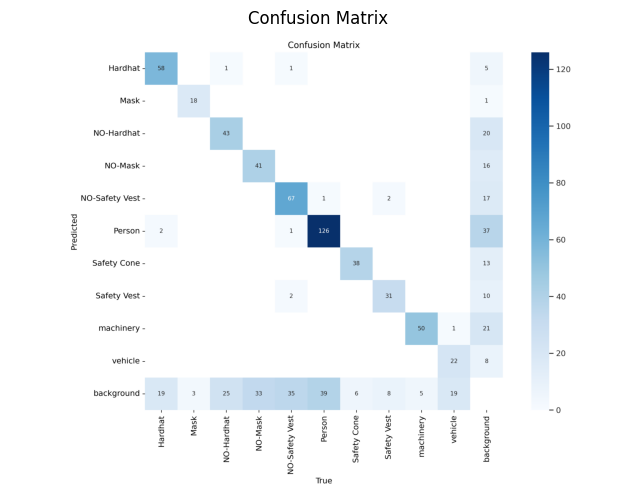

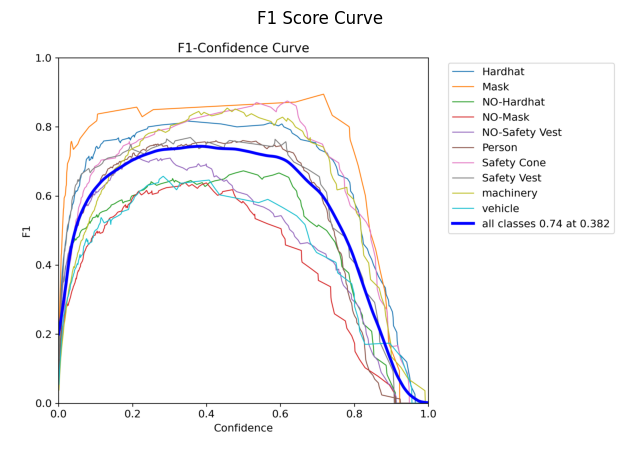

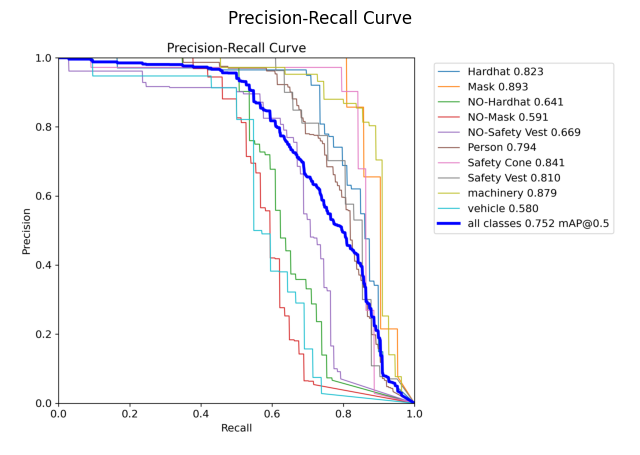

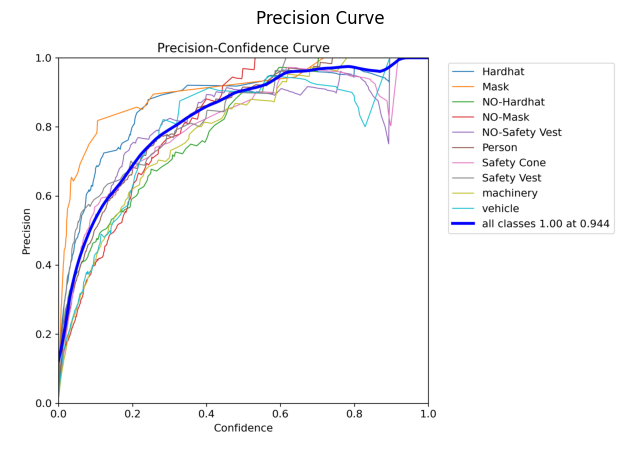

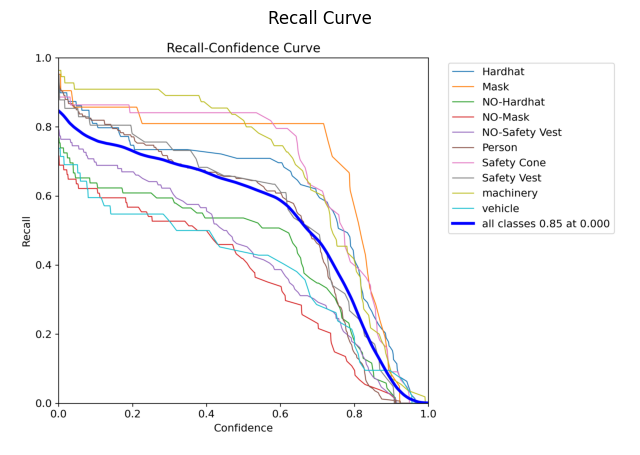

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the paths to the result files
confusion_matrix_path = '/kaggle/working/yolov5/runs/detect/apd/confusion_matrix.png'
F1_curve_path = '/kaggle/working/yolov5/runs/detect/apd/F1_curve.png'
PR_curve_path = '/kaggle/working/yolov5/runs/detect/apd/PR_curve.png'
P_curve_path = '/kaggle/working/yolov5/runs/detect/apd/P_curve.png'
R_curve_path = '/kaggle/working/yolov5/runs/detect/apd/R_curve.png'

# Display the confusion matrix
confusion_matrix = mpimg.imread(confusion_matrix_path)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix)
plt.title('Confusion Matrix')
plt.axis('off')
plt.show()

# Display F1 Score Curve
F1_curve = mpimg.imread(F1_curve_path)
plt.figure(figsize=(8, 6))
plt.imshow(F1_curve)
plt.title('F1 Score Curve')
plt.axis('off')
plt.show()

# Display Precision-Recall Curve
PR_curve = mpimg.imread(PR_curve_path)
plt.figure(figsize=(8, 6))
plt.imshow(PR_curve)
plt.title('Precision-Recall Curve')
plt.axis('off')
plt.show()

# Display Precision Curve
P_curve = mpimg.imread(P_curve_path)
plt.figure(figsize=(8, 6))
plt.imshow(P_curve)
plt.title('Precision Curve')
plt.axis('off')
plt.show()

# Display Recall Curve
R_curve = mpimg.imread(R_curve_path)
plt.figure(figsize=(8, 6))
plt.imshow(R_curve)
plt.title('Recall Curve')
plt.axis('off')
plt.show()


image 1/1 /kaggle/input/datatestnew/testdatanew/data2.jpeg: 640x480 4 Hardhats, 3 NO-Masks, 8 Persons, 4 Safety Vests, 7.0ms
Speed: 1.8ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


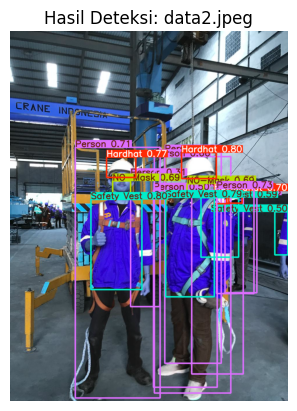


image 1/1 /kaggle/input/datatestnew/testdatanew/data3.jpeg: 640x480 13 Hardhats, 2 NO-Safety Vests, 18 Persons, 13 Safety Vests, 7.1ms
Speed: 2.0ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


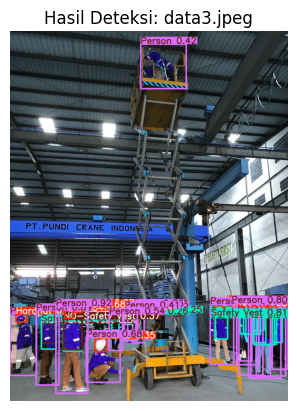


image 1/1 /kaggle/input/datatestnew/testdatanew/data4.jpeg: 640x480 1 Hardhat, 2 NO-Masks, 2 NO-Safety Vests, 2 Persons, 7.3ms
Speed: 2.6ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


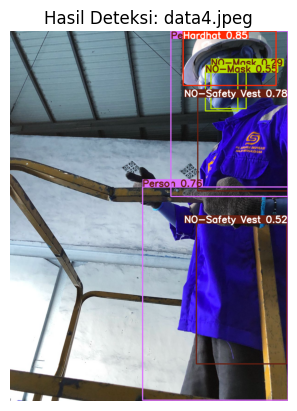


image 1/1 /kaggle/input/datatestnew/testdatanew/data5.jpeg: 640x480 5 Hardhats, 2 NO-Masks, 6 NO-Safety Vests, 10 Persons, 2 Safety Vests, 7.3ms
Speed: 2.6ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


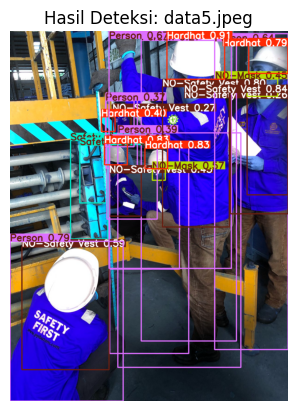


image 1/1 /kaggle/input/datatestnew/testdatanew/alem.jpg: 640x480 2 Masks, 3 NO-Hardhats, 2 NO-Masks, 4 NO-Safety Vests, 4 Persons, 1 machinery, 7.4ms
Speed: 2.5ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


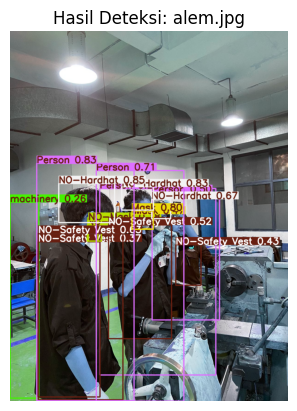


image 1/1 /kaggle/input/datatestnew/testdatanew/apd1.jpg: 384x640 2 Hardhats, 1 NO-Mask, 2 NO-Safety Vests, 2 Persons, 39.9ms
Speed: 2.0ms preprocess, 39.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


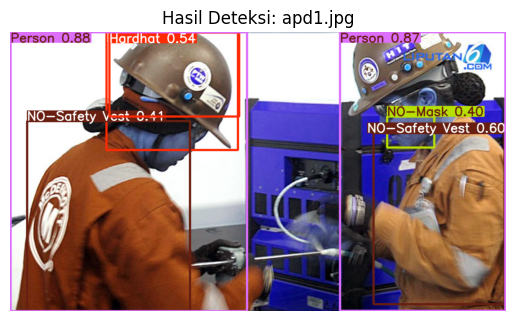

In [43]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np

# Path ke model yang sudah terlatih
model_path = "/kaggle/working/yolov5/runs/detect/apd/weights/best.pt"

# Path ke folder data baru
# new_data_path = "/content/apd1.jpg" # This was the issue, pointing to a file, not directory
new_data_path = "/kaggle/input/datatestnew/testdatanew"  # Corrected path pointing to a directory

allowed_formats = ('.jpg', '.jpeg', '.png', '.jpeg')
# Inisialisasi model YOLO
model = YOLO(model_path)

# Pastikan folder data baru ada dan berisi gambar
# Include apd1.jpg specifically if that's the only file you want to process
data_files = ['data2.jpeg','data3.jpeg','data4.jpeg','data5.jpeg','alem.jpg','apd1.jpg'] # Include 'apd1.jpg' since it's in the 'new_data_path' directory

# Now, you can process the 'apd1.jpg' file
for img_file in data_files:
    img_path = os.path.join(new_data_path, img_file)

    # Lakukan deteksi
    results = model.predict(source=img_path, save=False, save_txt=False, save_crop=False)

    # Ambil hasil deteksi
    detected_image = results[0].plot()  # Generate image with bounding boxes

    # Tampilkan hasil deteksi
    plt.imshow(detected_image)
    plt.axis('off')
    plt.title(f"Hasil Deteksi: {img_file}")
    plt.show()